In [1]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import h5py
import matplotlib.pyplot as plt
from scipy.optimize import leastsq,curve_fit
import math

In [2]:
def sin(t,amp,freq,phase,offset):
    res = (amp*np.sin((2*np.pi*freq*t)+phase)) + offset
    return res 

def decaying_sin(t,tau,amp,freq,phase,offset):
    res = (amp*np.exp(-t/tau)*np.sin((2*np.pi*freq*t)+phase)) + offset
    return res 

def est_freq(ydata,tgap,tau,amp,freq,phase,offset): # Estimation of frequency change (from dy/df where y=sinusoidal fit)
    res=(ydata-decaying_sin(tau,tgap,amp,freq,phase,offset))/(amp*np.exp(-tgap/tau)*2*np.pi*tgap*np.cos(2*np.pi*freq*tgap+phase))
    return res

def gaussian(x,amp,x0,sigma,offset):
    res=(amp*np.exp((-(x-x0)**2)/(sigma**2)))+offset
    return res

def make_plots(QDP,retention):
    colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    fig, ax = plt.subplots()
    for roi in [1,2]:
        error=0
        data = []
        reten = []
        err = []
        for e in range(len(np.squeeze(retention['ivar']))):
            data.append(np.squeeze(retention['ivar'])[e][roi])
            reten.append(np.squeeze(retention['retention'])[e][roi])
            err.append(np.squeeze(retention['error'])[e][roi])
        if QDP.experiments[0]['variable_list']==[]:
            data=range(0,np.size(retention['ivar'],axis=1))
            xlab = 'iteration'
        else:
            xlab = QDP.experiments[0]['variable_desc'][QDP.experiments[0]['variable_list'][0]]['description']
        ax.errorbar(data,reten,yerr=err,label="ROI:{}".format(roi),fmt='o',color=colors[roi])
    plt.show()
    ax.set_ylim(0, 1)
    ax.set_xlabel(xlab)
    ax.set_ylabel('retention')
    ax.set_title(exp_id)
    ax.grid()
    ax.legend()

# Set experiment to analyze


In [23]:
#analysis_master_path='Y:/Rb/Analysis/' # Y:\ is network drive connected to Hexagon E:\Rb\
exp_id='2018_03_03_01_08_20_Open loop Microwave Ramsey with 780A, r1-r2, Tgap=1.8us, N=500, long one'
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=data_master_path+exp_date+'/'+exp_id+'/'
experiment_file='results.hdf5'
dp=exp_path
cuts = [[450],[450],[450]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
for r in range(5):
    q.set_thresholds(cuts, roi=r)
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
q.get_thresholds()
retention = q.apply_thresholds()

no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed
no loading observed


QDP\qdp.py:242: RuntimeWarning: invalid value encountered in divide
  e['iterations'][i]['retention'] = retention/loaded
QDP\qdp.py:85: RuntimeWarning: invalid value encountered in sqrt
  errs[r] = (z/n[r].astype('float'))*np.sqrt(ns[r].astype('float')*(1.0-ns[r].astype('float')/n[r].astype('float')))


<IPython.core.display.Javascript object>


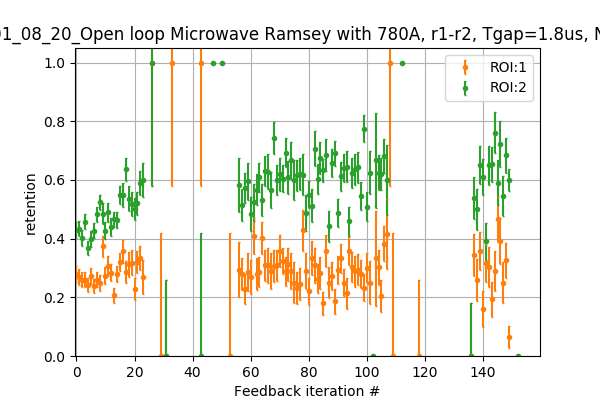

In [24]:
savefig=False
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
fit_guesses=[30,0.4,2,0,0.5]
roi_dependency=[0,0,0,0,0]
fitted_parameters=[]
for roi in [1,2]:
    error=0
    data = []
    reten = []
    err = []
    for e in range(len(np.squeeze(retention['ivar']))):
        data.append(np.squeeze(retention['ivar'])[e][roi])
        reten.append(np.squeeze(retention['retention'])[e][roi])
        err.append(np.squeeze(retention['error'])[e][roi])
    ax.errorbar(data,reten,yerr=err,label="ROI:{}".format(roi),fmt='o',markersize=3,color=colors[roi],capsize=1)
#     guesses=np.add(fit_guesses,np.ones(len(fit_guesses))*(roi-2)*roi_dependency)
#     try:
#         fit,pcov = curve_fit(decaying_sin,data,reten,guesses)
#     except RuntimeError:
#         error=1
#     if error is not 1:
#         print "ROI:{}, tau : {}, amplitude {} , freq:{}, phase:{}, offset:{}".format(roi,fit[0],fit[1],fit[2],fit[3],fit[4])
#         fitted_parameters.append(fit[0])
#         xarray=np.linspace(np.min(data),np.max(data),100)
#         yfit=decaying_sin(xarray, fit[0],fit[1],fit[2],fit[3],fit[4])
#         plt.plot(xarray,yfit,label="ROI:{}".format(roi),color=colors[roi])

plt.show()
ax.set_title(exp_id)
ax.set_ylim(0, 1.05)
ax.set_xlim(-0.5,)
ax.grid()
#ax.set_xlabel(xlab)
ax.set_xlabel('Feedback iteration #')
ax.set_ylabel('retention')
ax.legend()
if savefig:
    fig.savefig(exp_id+'atom_Retention.pdf')
    fig.savefig(exp_id+'atom_Retention.png')

# Camera plots, red

<IPython.core.display.Javascript object>


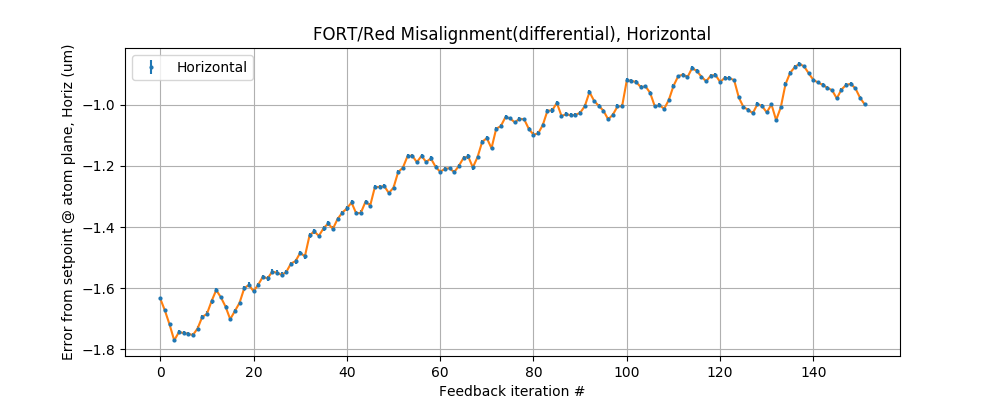

152
152


<IPython.core.display.Javascript object>


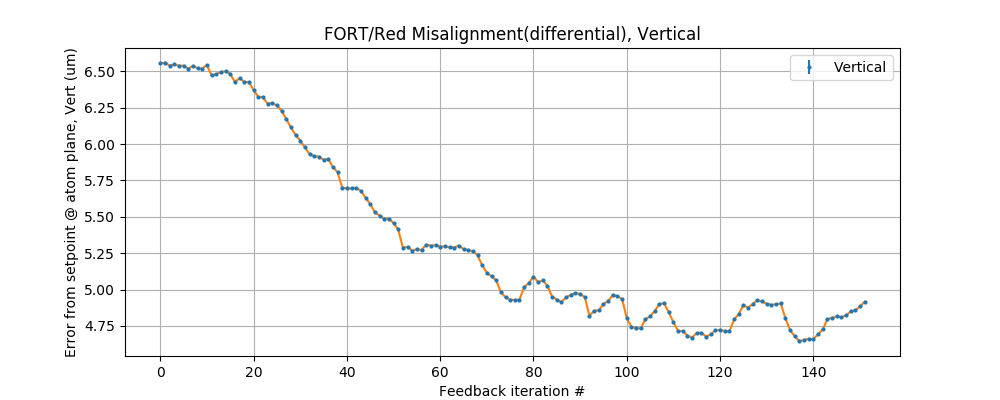

<IPython.core.display.Javascript object>


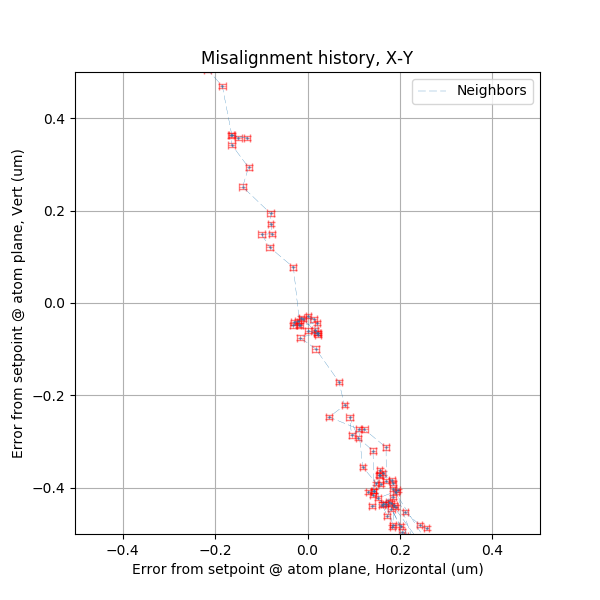

In [26]:
savefig=False
figW=10
figH=4
whichside='AAS_redside' #'AAS_
#whichside='AAS_redside'
fig, ax = plt.subplots()
fig.set_size_inches(figW,figH)
xdata = []
ydata = []
yerr = []
target=np.array([-100,-48])
sample_numbers=500
user_specified=152
iteration_range=range(min(len(np.squeeze(retention['ivar'])),user_specified))
for e in iteration_range:
    xdata.append(np.squeeze(retention['ivar'])[e][2])
    ydata.append(q.experiments[0]['iterations'][e][whichside]['x'])
    yerr.append(q.experiments[0]['iterations'][e][whichside]['sigma_x'])
print np.size(xdata)    
print np.size(ydata)
offset=target[0]#np.mean(ydata)
Xcoord=ydata-offset
Xcoord_err=yerr
ax.errorbar(xdata,Xcoord,yerr=np.array(yerr)/(np.sqrt(sample_numbers)),fmt='o',markersize=2,label='Horizontal')
ax.plot(xdata,Xcoord)

plt.show()
#ax.set_title(exp_id)
ax.set_title('FORT/Red Misalignment(differential), Horizontal')
#ax.set_xlim(0,130)
#ax.set_ylim(-10, 10)
ax.set_xlabel(xlab)
ax.set_ylabel('Error from setpoint @ atom plane, Horiz (um)')
ax.grid()
ax.legend()
ax.set_xlabel('Feedback iteration #')
if savefig:
    fig.savefig(exp_id+'Camera_X.pdf')
    fig.savefig(exp_id+'Camera_X.png')

fig, ax = plt.subplots()
fig.set_size_inches(figW,figH)
xdata = []
ydata = []
yerr = []
iteration_range=range(min(len(np.squeeze(retention['ivar'])),user_specified))
for e in iteration_range:
    xdata.append(np.squeeze(retention['ivar'])[e][2])
    ydata.append(q.experiments[0]['iterations'][e][whichside]['y'])
    yerr.append(q.experiments[0]['iterations'][e][whichside]['sigma_y'])
offset=target[1]
Ycoord=ydata-offset
Ycoord_err=yerr
ax.set_title('FORT/Red Misalignment(differential), Vertical')
ax.errorbar(xdata,Ycoord,yerr=np.array(yerr)/(np.sqrt(sample_numbers)),fmt='o',markersize=2,label='Vertical')
ax.plot(xdata,Ycoord)

#ax.set_title(exp_id)
#ax.set_xlim(0,130)
#ax.set_ylim(11.6, 13)
ax.set_xlabel(xlab)
ax.set_ylabel('Error from setpoint @ atom plane, Vert (um)')
ax.grid()
ax.legend()
ax.set_xlabel('Feedback iteration #')
if savefig:
    fig.savefig(exp_id+'Camera_Y.pdf')
    fig.savefig(exp_id+'Camera_Y.png')

fig, ax = plt.subplots()
fig.set_size_inches(6,6)
length_conversion=1.0 # Red gives already in um units
cutoff=-1
xdata=length_conversion*(Xcoord[0:cutoff]-np.nanmean(Xcoord))
xerr=length_conversion*np.array(Xcoord_err[0:cutoff])/math.sqrt(sample_numbers)
ydata=length_conversion*(Ycoord[0:cutoff]-np.nanmean(Ycoord))
yerr=length_conversion*np.array(Ycoord_err[0:cutoff])/math.sqrt(sample_numbers)
ax.errorbar(xdata,ydata,xerr=xerr,yerr=yerr,fmt='o',ecolor='red',elinewidth=0.5,markersize=1,capsize=3,alpha=0.5)
ax.plot(xdata,ydata,'--',linewidth=0.2,label='Neighbors')

ax.set_title('Misalignment history, X-Y')
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_xlabel('Error from setpoint @ atom plane, Horizontal (um)')
ax.set_ylabel('Error from setpoint @ atom plane, Vert (um)')
ax.set_aspect('equal', 'datalim')
ax.grid()
ax.legend()
if savefig:
    fig.savefig(exp_id+'Camera Beam history.pdf')
    fig.savefig(exp_id+'Camera Beam history.png')

In [77]:
q.experiments[0]['iterations'][0]

{'AAS_blueside': {},
 'AAS_redside': {'ctrl_x': -0.10053049778375971,
  'ctrl_y': -0.59898671295941097,
  'error_x': -0.36295879694336008,
  'error_y': -1.7033885760300223,
  'sigma_x': 0.05667258028647764,
  'sigma_y': 0.056232172550881178,
  'x': -101.07024656641195,
  'y': -45.368050951997496},
 'FORT_camera_dataX': 224.26534271505133,
 'FORT_camera_dataY': 48.81424368500582,
 'Red_camera_dataX': 325.33077444646483,
 'Red_camera_dataY': 94.197098932998756,
 'loaded': array([ 0.,  0.,  0.,  0.,  0.]),
 'loading': array([ 0.,  0.,  0.,  0.,  0.]),
 'quantized_data': array([[[ 0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.]],
 
        ..., 
        [[ 0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.],
        

# Actuator plot

<IPython.core.display.Javascript object>


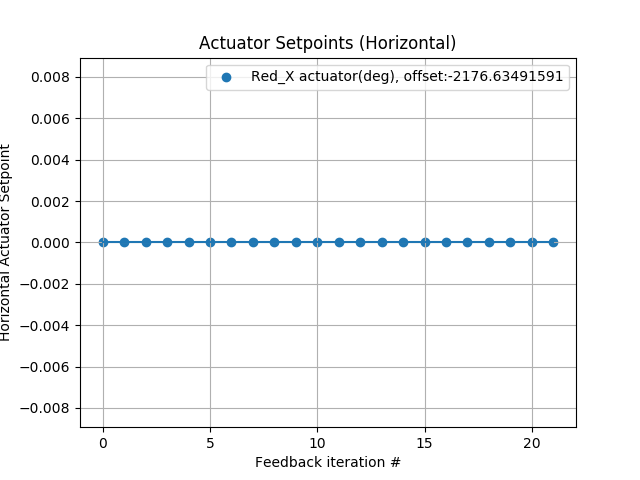

<IPython.core.display.Javascript object>


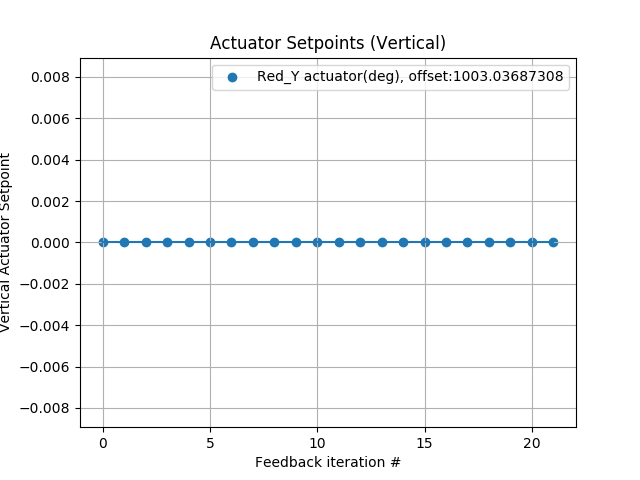

<IPython.core.display.Javascript object>


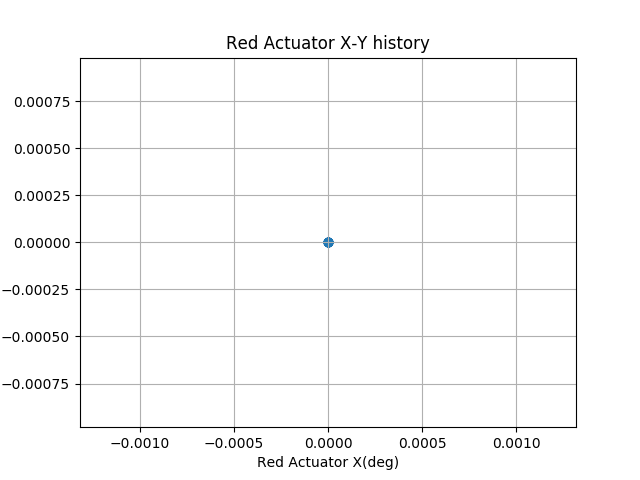

In [58]:
## X actuator plot
fig, ax = plt.subplots()
xdata = []
ydata = []
for e in range(len(np.squeeze(retention['ivar']))):
    xdata.append(np.squeeze(retention['ivar'])[e][2])
    ydata.append(q.experiments[0]['iterations'][e]['variables']['Red_X'])
offset=ydata[0]#np.median(ydata)
Xactuator=ydata-offset
ax.scatter(xdata,Xactuator,label='Red_X actuator(deg), offset:{}'.format(offset))
ax.plot(xdata,Xactuator)
#ax.set_title(exp_id)
ax.set_title('Actuator Setpoints (Horizontal)')
#ax.set_xlim(0,130)
#ax.set_ylim(-10, 10)
ax.set_xlabel('Feedback iteration #')
ax.set_ylabel('Horizontal Actuator Setpoint')
ax.grid()
ax.legend()
plt.show()
if savefig:
    fig.savefig(exp_id+'actuatorX.pdf')
    fig.savefig(exp_id+'actuatorX.png')

## Y actuator plot
fig, ax = plt.subplots()
xdata = []
ydata = []
for e in range(len(np.squeeze(retention['ivar']))):
    xdata.append(np.squeeze(retention['ivar'])[e][2])
    ydata.append(q.experiments[0]['iterations'][e]['variables']['Red_Y'])
offset=ydata[0]
Yactuator=ydata-offset
ax.scatter(xdata,Yactuator,label='Red_Y actuator(deg), offset:{}'.format(offset))
ax.plot(xdata,Yactuator)


#ax.set_title(exp_id)
ax.set_title('Actuator Setpoints (Vertical)')
#ax.set_xlim(0,130)
#ax.set_ylim(11.6, 13)
ax.set_xlabel('Feedback iteration #')
ax.set_ylabel('Vertical Actuator Setpoint')
ax.grid()
ax.legend()
if savefig:
    fig.savefig(exp_id+'actuatorY.pdf')
    fig.savefig(exp_id+'actuatorY.png')
##
fig, ax = plt.subplots()
length_conversion=1.0 # Red gives already in um units
cutoff=-1
xdata=Xactuator[0:cutoff]
ydata=Yactuator[0:cutoff]
ax.plot(xdata,ydata)
ax.scatter(xdata,ydata)
ax.set_title('Red Actuator X-Y history')
#ax.set_xlim(-1,1)
#ax.set_ylim(-1, 1)
ax.set_xlabel('Red Actuator X(deg)')
ax.set_ylabel('Red Actuator Y(deg)')
ax.set_aspect('equal', 'datalim')
ax.grid()
ax.legend()
if savefig:
    fig.savefig(exp_id+'actuatorXY.pdf')
    fig.savefig(exp_id+'actuatorXY.png')

<IPython.core.display.Javascript object>


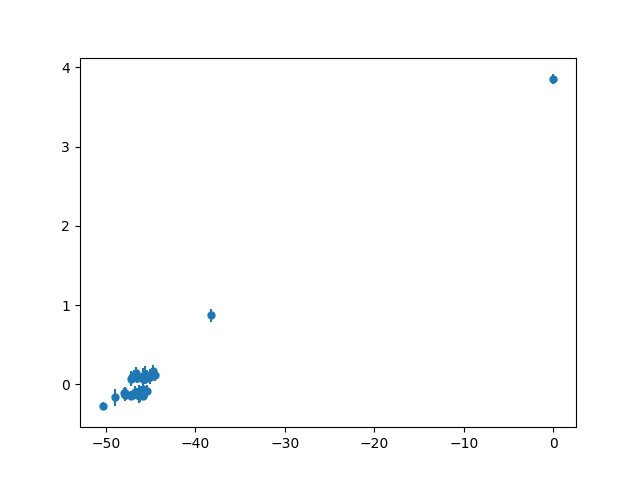

<IPython.core.display.Javascript object>


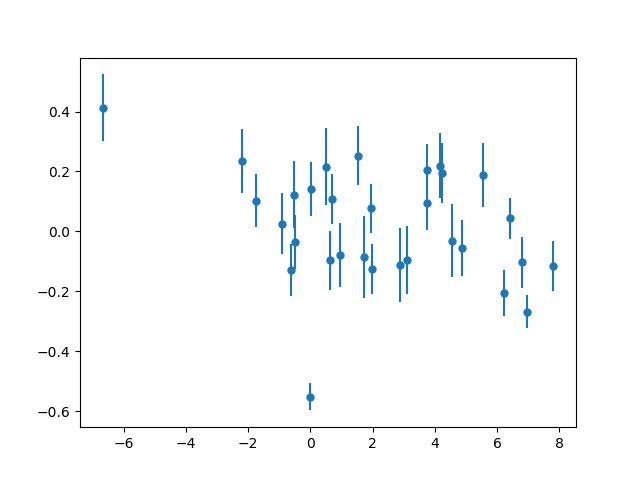

<Container object of 3 artists>

In [67]:
fig, ax = plt.subplots()
ax.errorbar(Xactuator,Xcoord,yerr=Xcoord_err,fmt='o',markersize=5)
fig, ax = plt.subplots()
ax.errorbar(Yactuator,Ycoord,yerr=Ycoord_err,fmt='o',markersize=5)

<IPython.core.display.Javascript object>

AttributeError: Unknown property fmt

<IPython.core.display.Javascript object>


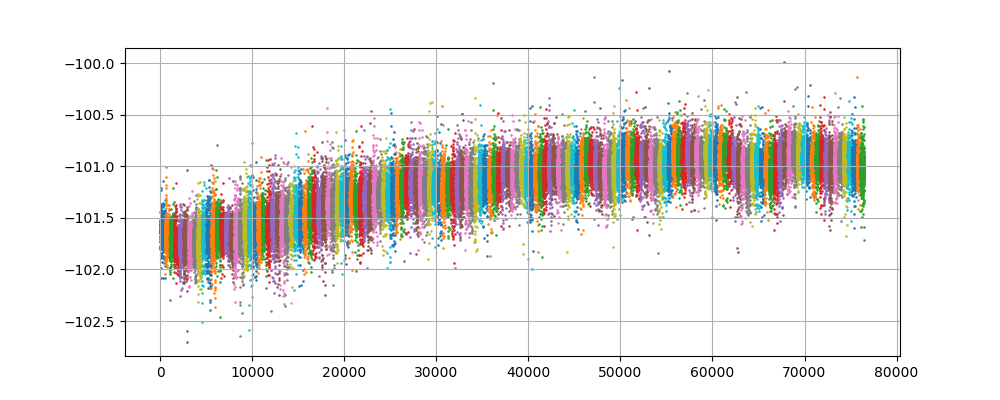

C:\Users\Rb\AppData\Local\Enthought\Canopy\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(10,4)
for e in range(len(np.squeeze(retention['ivar']))):
    data1=np.array(q.experiments[0]['iterations'][e]['FORT_camera_dataX'])
    data2=np.array(q.experiments[0]['iterations'][e]['Red_camera_dataX'])
    x=np.array(range(0,np.size(data1)))
    ax.scatter(x+np.size(data1)*e,data1-data2,s=0.7) #in microns

#ax.set_title(exp_id)
#ax.set_title('Actuator Setpoints (Horizontal)')
#ax.set_xlim(5500,6700)
#ax.set_ylim(-10, 10)
#ax.set_xlabel('Feedback iteration #')
#ax.set_ylabel('Horizontal Actuator Setpoint')
ax.grid()
ax.legend()
plt.show()


<IPython.core.display.Javascript object>


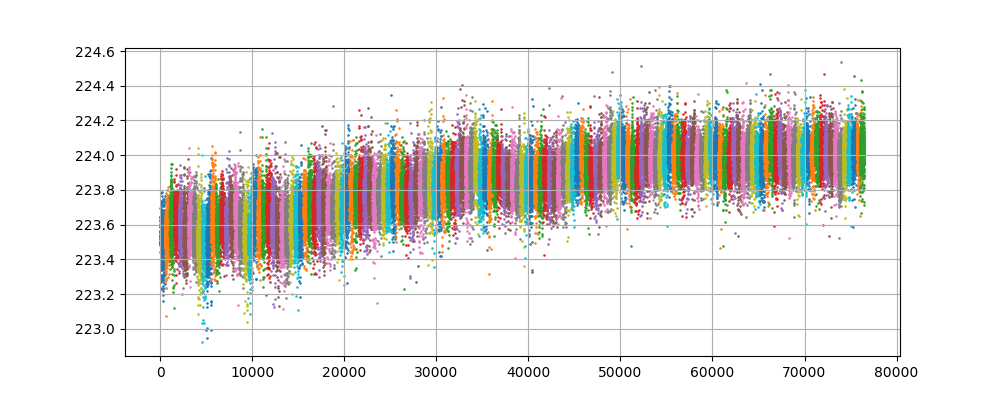

<IPython.core.display.Javascript object>


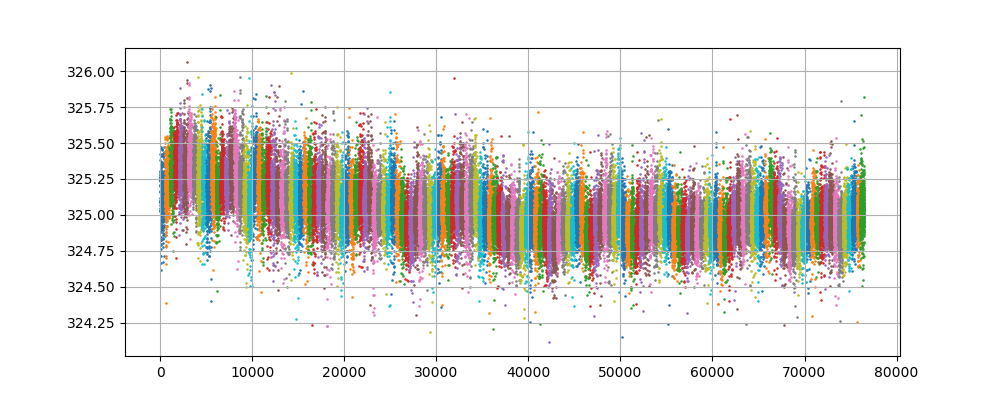

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(10,4)
for e in range(len(np.squeeze(retention['ivar']))):
    data1=np.array(q.experiments[0]['iterations'][e]['FORT_camera_dataX'])
    x=np.array(range(0,np.size(data1)))
    ax.scatter(x+np.size(data1)*e,data1,s=0.7) #in microns

#ax.set_title(exp_id)
#ax.set_title('Actuator Setpoints (Horizontal)')
#ax.set_xlim(0,130)
#ax.set_ylim(-10, 10)
#ax.set_xlabel('Feedback iteration #')
#ax.set_ylabel('Horizontal Actuator Setpoint')
#ax.set_xlim(5000,6000)
ax.grid()
ax.legend()
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(10,4)
for e in range(len(np.squeeze(retention['ivar']))):
    #data1=np.array(q.experiments[0]['iterations'][e]['FORT_camera_dataX'])
    data2=np.array(q.experiments[0]['iterations'][e]['Red_camera_dataX'])
    x=np.array(range(0,np.size(data2)))
    ax.scatter(x+np.size(data2)*e,data2,s=0.7) #in microns


#ax.set_title(exp_id)
#ax.set_title('Actuator Setpoints (Horizontal)')
#ax.set_xlim(0,2000)
#ax.set_ylim(-10, 10)
#ax.set_xlabel('Feedback iteration #')
#ax.set_ylabel('Horizontal Actuator Setpoint')
#ax.set_xlim(5000,6000)
ax.grid()
ax.legend()
plt.show()

In [74]:
len(np.squeeze(retention['ivar']))

301